In [12]:
config_file = 'config_run1.json'

In [13]:
import os
import json
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

with open(config_file) as config:
    info = json.load(config)
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= info['simul']['gpu_id']

In [21]:
metric_path = info['output']['metric_path']
df = pd.read_csv(os.path.join(metric_path, 'metric.csv'))

iter = np.array(df['iter'])
C_vec = np.array(df['C_vec'])
C_cs = np.array(df['C_cs'])
En_1 = np.array(df['1-En'])
Em_1 = np.array(df['1-Em'])
eps = np.array(df['eps'])
eps_p = np.array(df['eps_p'])
sig_J = np.array(df['sig_J'])
L1 = np.array(df['L1'])
L2 = np.array(df['L2'])

metrics = {r'$C_{\text{vec}}$':C_vec,
           r'$C_{\text{cs}}$':C_cs,
           r'$1-E_n$':En_1,
           r'$1-E_m$':Em_1,
           r'$\epsilon$':eps,
           r'$\epsilon_p$':eps_p,
           r'$\sigma_J$':sig_J,
           r'$L_1$':L1,
           r'$L_2$':L2,}

/tmp/ipykernel_21765/2963936804.py:13: DeprecationWarning: invalid escape sequence '\e'
  label = codecs.decode(label, 'unicode_escape')
/tmp/ipykernel_21765/2963936804.py:13: DeprecationWarning: invalid escape sequence '\e'
  label = codecs.decode(label, 'unicode_escape')
/tmp/ipykernel_21765/2963936804.py:13: DeprecationWarning: invalid escape sequence '\s'
  label = codecs.decode(label, 'unicode_escape')


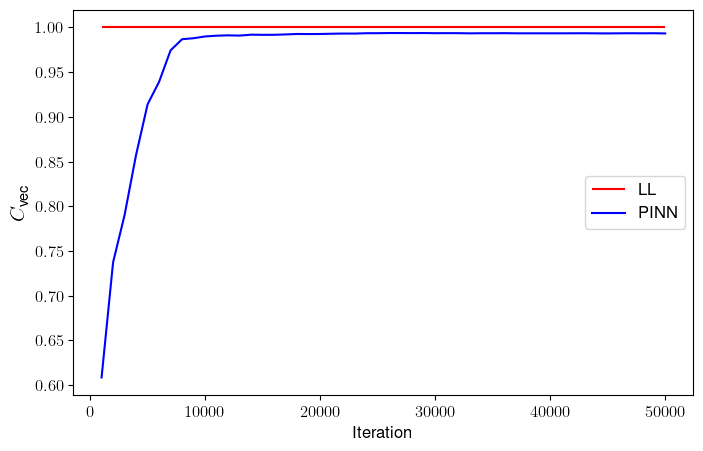

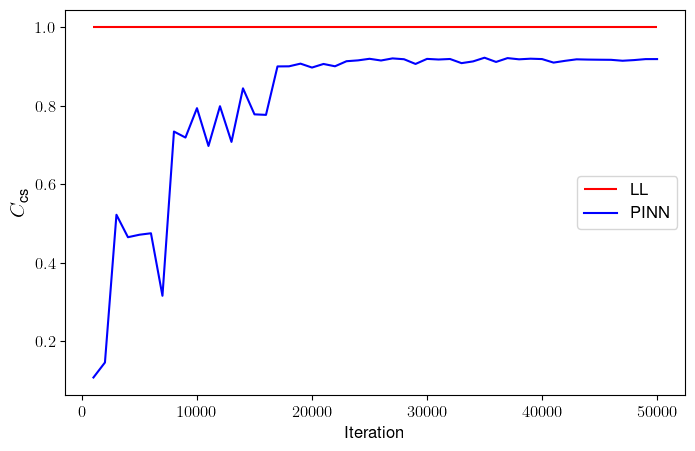

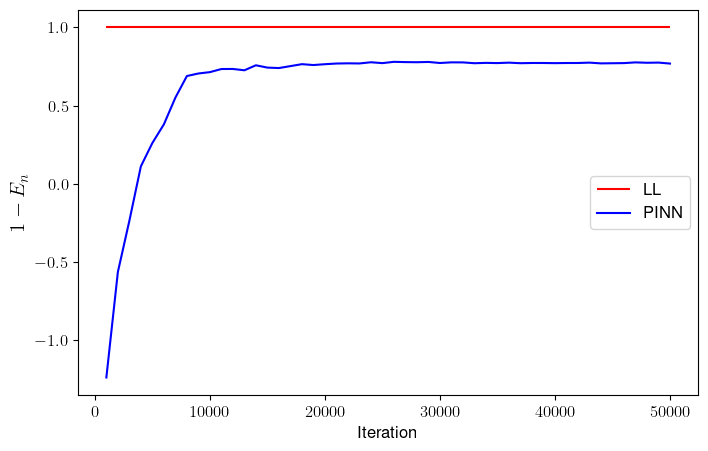

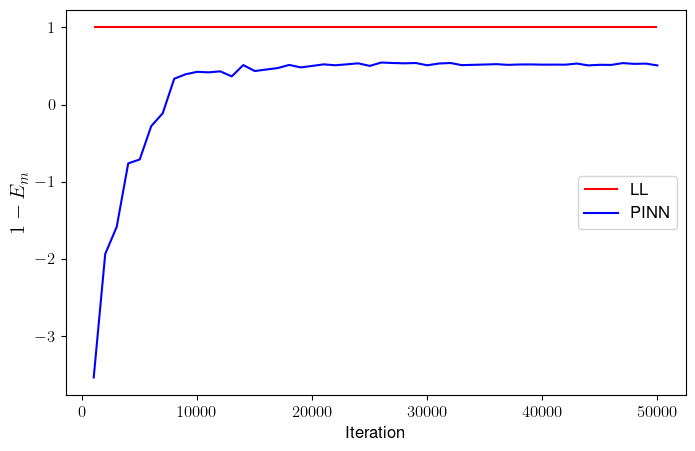

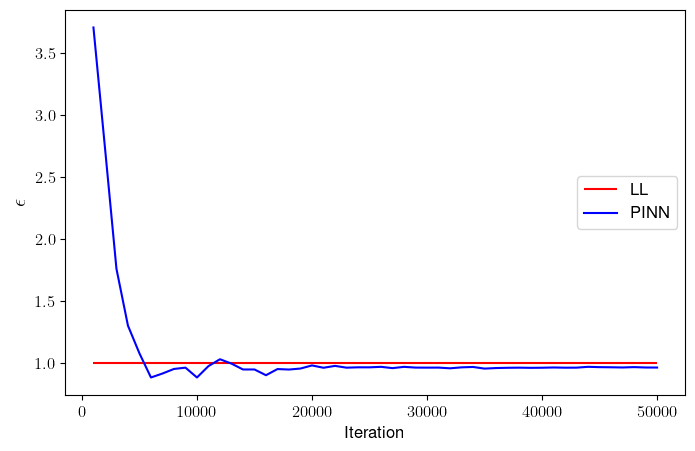

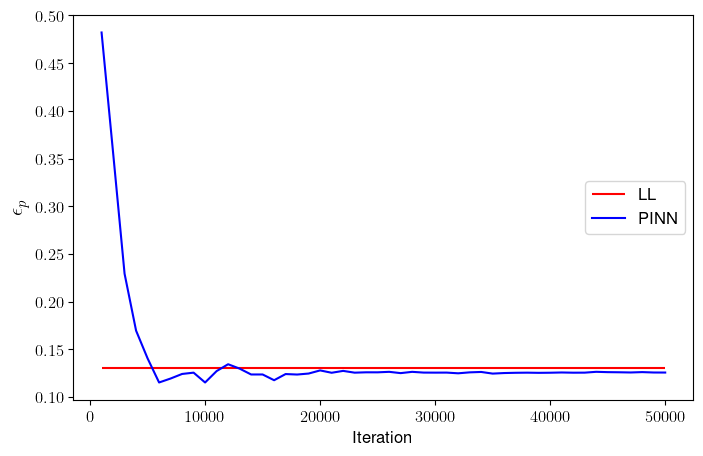

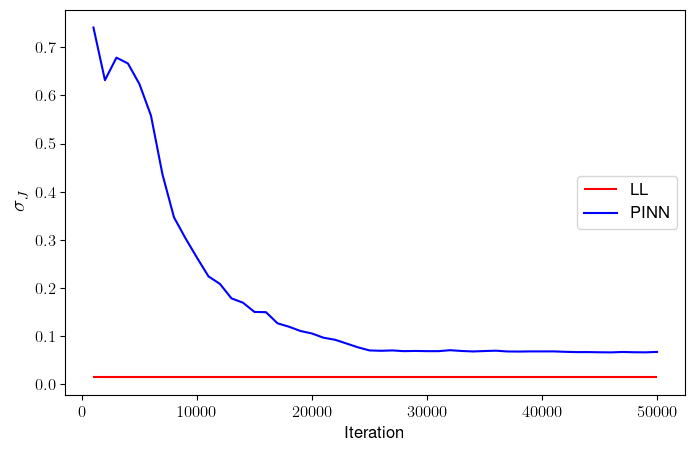

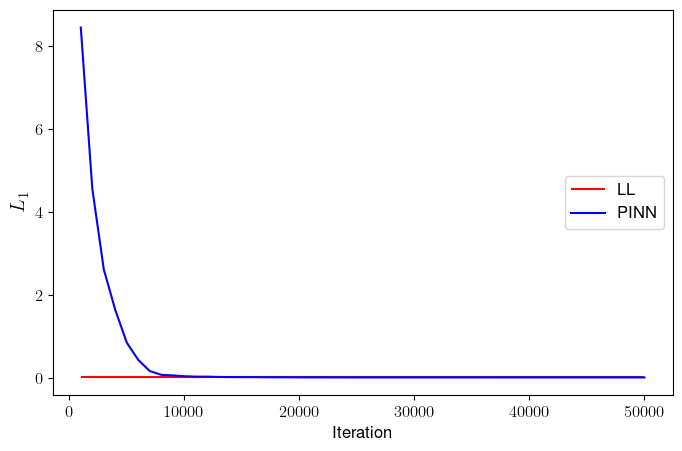

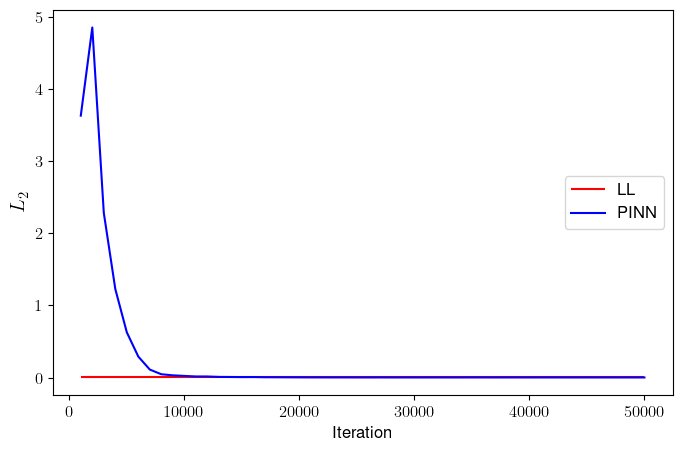

In [24]:
import codecs

def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,5))
        ax.hlines(metric[0], xmin=iter[1], xmax=iter[-1], color='red', label='LL')
        ax.plot(iter[1:], metric[1:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=15)
        ax.legend(loc='center right', fontsize=12)
        ax.set_xlabel('Iteration', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = codecs.decode(label, 'unicode_escape')
        label = label.replace('$', '')
        label = label.replace('\\', '')
        fig.savefig(os.path.join(img_path, f'{label}.png'))

img_path = info['eval']['img_path']
os.makedirs(img_path, exist_ok=True)
plot_metric(metrics, img_path)